<h3>Import Libraries</h3>

In [90]:
import numpy as np
import pandas as pd

<h3>Import Data</h3>

In [91]:
data = pd.read_excel('./Folds5x2_pp.xlsx')
pd.DataFrame(data)
# data_df.head(10)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


<h3>Define x and y</h3>

In [92]:
X = data.drop('PE', axis=1).values
y = data['PE'].values

In [93]:
print(X)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [94]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


<h3>Split the dataset in training set and test set</h3>

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<h3>Train the model on the training set</h3>

In [96]:
from sklearn.linear_model import LinearRegression

ml = LinearRegression()
ml.fit(X_train, y_train)

LinearRegression()

<h3>Predict the test set results</h3>

In [97]:
y_pred = ml.predict(X_test)
print(y_pred)

[431.40245096 458.61474119 462.81967423 ... 432.47380825 436.16417243
 439.00714594]


In [98]:
#just testing the model 
print(ml.predict(X_test[0:3, :].reshape(-1, 4)))
print(y_test[0:3])

[431.40245096 458.61474119 462.81967423]
[431.23 460.01 461.14]


<h3>Evaluate the model</h3>

In [99]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))

0.9304112159477683


<h3>Plot the results</h3>

Text(0.5, 1.0, 'Actual vs. predicted')

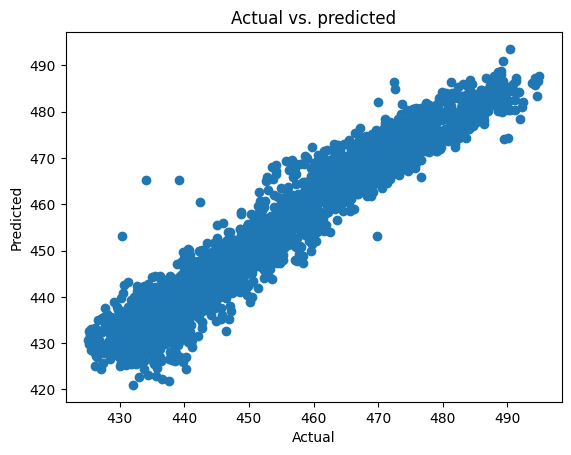

In [100]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(15, 10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. predicted')

<h3>Predicted values</h3>

In [101]:
pred_y_df = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred, 'Difference': y_pred-y_test})

display(pred_y_df[0:20])

,Actual value,Predicted value,Difference
0,431.23,431.402451,0.172451
1,460.01,458.614741,-1.395259
2,461.14,462.819674,1.679674
3,445.90,448.601237,2.701237
4,451.29,457.879479,6.589479
5,432.68,429.676856,-3.003144
6,477.50,473.017115,-4.482885
7,459.68,456.532373,-3.147627
8,477.50,474.342524,-3.157476
9,444.99,446.364396,1.374396


In [109]:
x_example = np.array([21.60, 62.52, 1017.23, 67.87]).reshape(-1, 4)
print(x_example)
print(ml.predict(x_example))

[[  21.6    62.52 1017.23   67.87]]
[449.68466713]
